In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
import sparsetools as sp
from matplotlib.colors import LogNorm
import os

In [2]:
#obs = sp.profile('../../ibis_alma3_obs.nc').extractPix(x1=320,y1=320)
#xi_fit = sp.profile('../band3/alma/alma_fit_2_redux.nc')
#xi_mod = sp.model('../band3/alma/alma_mod_2_redux.nc')
#tau_fit = sp.profile('../band3/alma/alma_fit_2_ltau.nc')
#tau_mod = sp.model('../band3/alma/alma_mod_2_ltau.nc')
obs = sp.profile('../../ibis_alma3_obs.nc').extractPix(x1=320,y1=320)
xi_fit = sp.profile('../band3/alma/alma_fit_2_redux.nc').extractPix(x1=320,y1=320)
xi_mod = sp.model('../band3/alma/alma_mod_2_redux.nc').extract(x1=320,y1=320)
tau_fit = sp.profile('../band3/ltau/ibis_alma3_fit_tau_filt.nc').extractPix(x1=320,y1=320)
tau_mod = sp.model('../band3/ltau/ibis_alma3_mod_tau_filt.nc').extract(x1=320,y1=320)

profile::setsize: nx=334, ny=334, nw=208, ns=4, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=208, ns=4, nt=1
profile::setsize: nx=320, ny=320, nw=208, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=208, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=208, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=208, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1


In [3]:
from scipy.interpolate import interp1d
xi_to_tau = np.zeros((320,320,61))
tau_to_xi = np.zeros((320,320,61))
for i in range(320):
    for j in range(320):
        xi_to_tau[i,j] = interp1d(xi_mod.ltau[0,i,j],xi_mod.temp[0,i,j],bounds_error=False,\
                                  fill_value=np.NaN)(tau_mod.ltau[0,i,j])
        tau_to_xi[i,j] = interp1d(np.log10(tau_mod.pgas[0,i,j]/27400.),tau_mod.temp[0,i,j],bounds_error=False,\
                                  fill_value=np.NaN)(xi_mod.cmass[0,i,j])
#xi_to_tau = np.zeros((320,61))
#tau_to_xi = np.zeros((320,61))
#for i in range(320):
#    xi_to_tau[i] = interp1d(xi_mod.ltau[0,i,0],xi_mod.temp[0,i,0],bounds_error=False,\
#                              fill_value=np.NaN)(tau_mod.ltau[0,i,0])
#    tau_to_xi[i] = interp1d(np.log10(tau_mod.pgas[0,i,0]/27400.),tau_mod.temp[0,i,0],bounds_error=False,\
#                              fill_value=np.NaN)(xi_mod.cmass[0,i,0])

/usr/lib/python3/dist-packages/scipy/interpolate/interpolate.py:687: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/usr/lib/python3/dist-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


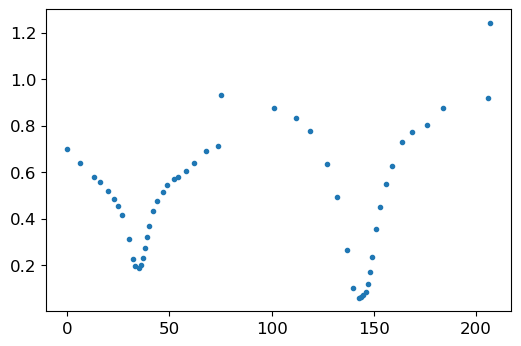

In [4]:
ind = np.where(obs.weights[:,0] < 1)[0]
plt.plot(ind,obs.averageSpectrum()[ind,0],'.')

<ipython-input-75-505e2a12bd32>:6: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[:27],0].ravel(),\
<ipython-input-75-505e2a12bd32>:6: RuntimeWarning: invalid value encountered in true_divide
  ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[:27],0].ravel(),\
<ipython-input-75-505e2a12bd32>:15: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[27:-1],0].ravel(),\
<ipython-input-75-505e2a12bd32>:15: RuntimeWarning: invalid value encountered in true_divide
  ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[27:-1],0].ravel(),\
<ipython-input-75-505e2a12bd32>:23: RuntimeWarning: divide by zero encountered in true_divide
  ax[1,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(tau_fit.dat / obs.dat - 1)[0,:,:,in

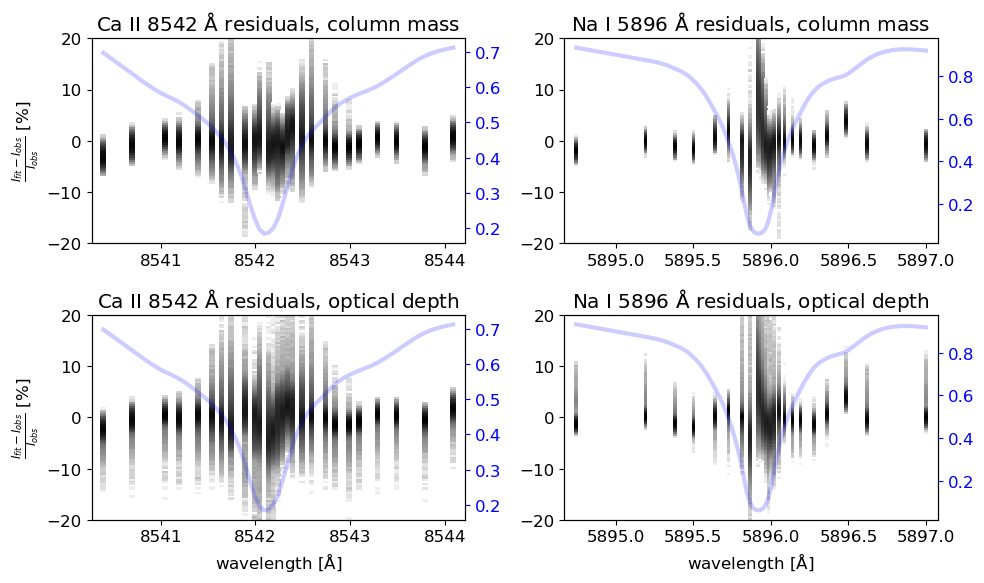

In [75]:
dwc = obs.wav[1] - obs.wav[0]
dwn = obs.wav[76] - obs.wav[75]
w0c = obs.wav[0]
w0n = obs.wav[75]
fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[:27],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
#ax[0,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
ax00 = ax[0,0].twinx()
ax00.plot(obs.wav[:75],obs.averageSpectrum()[:75,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax00.tick_params(axis='y',colors='blue')
ax[0,0].set_ylabel(r'$\frac{I_{fit} - I_{obs}}{I_{obs}}$ [%]')
ax[0,0].set_title(r'Ca II 8542 $\mathrm{\AA}$ residuals, column mass')
ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320**2),100*(xi_fit.dat / obs.dat - 1)[0,:,:,ind[27:-1],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
#ax[0,1].hist2d(obs.wav[ind[27:-1]].repeat(320),100*(xi_fit.dat / obs.dat - 1)[0,:,0,ind[27:-1],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
ax01 = ax[0,1].twinx()
ax01.plot(obs.wav[75:-1],obs.averageSpectrum()[75:-1,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax01.tick_params(axis='y',colors='blue')
ax[0,1].set_title(r'Na I 5896 $\mathrm{\AA}$ residuals, column mass')
ax[1,0].hist2d(obs.wav[ind[:27]].repeat(320**2),100*(tau_fit.dat / obs.dat - 1)[0,:,:,ind[:27],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
#ax[1,0].hist2d(obs.wav[ind[:27]].repeat(320),100*(tau_fit.dat / obs.dat - 1)[0,:,0,ind[:27],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(80)-2.5)*dwc+w0c,np.linspace(-0.2,0.2,101)*100])
ax10 = ax[1,0].twinx()
ax10.plot(obs.wav[:75],obs.averageSpectrum()[:75,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax10.tick_params(axis='y',colors='blue')
ax[1,0].set_xlabel(r'wavelength [$\mathrm{\AA}$]')
ax[1,0].set_ylabel(r'$\frac{I_{fit} - I_{obs}}{I_{obs}}$ [%]')
ax[1,0].set_title(r'Ca II 8542 $\mathrm{\AA}$ residuals, optical depth')
ax[1,1].hist2d(obs.wav[ind[27:-1]].repeat(320**2),100*(tau_fit.dat / obs.dat - 1)[0,:,:,ind[27:-1],0].ravel(),\
          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
#ax[1,1].hist2d(obs.wav[ind[27:-1]].repeat(320),100*(tau_fit.dat / obs.dat - 1)[0,:,0,ind[27:-1],0].ravel(),\
#          cmap='gist_yarg',norm=LogNorm(),bins=[(np.arange(141)-4.5)*dwn+w0n,np.linspace(-0.2,0.2,101)*100])
ax11 = ax[1,1].twinx()
ax11.plot(obs.wav[75:-1],obs.averageSpectrum()[75:-1,0],linestyle='-',linewidth=3,color='blue',alpha=0.2)
ax11.tick_params(axis='y',colors='blue')
ax[1,1].set_xlabel(r'wavelength [$\mathrm{\AA}$]')
ax[1,1].set_title(r'Na I 5896 $\mathrm{\AA}$ residuals, optical depth')
plt.tight_layout()
plt.savefig('xi_v_tau_residuals_new.pdf')

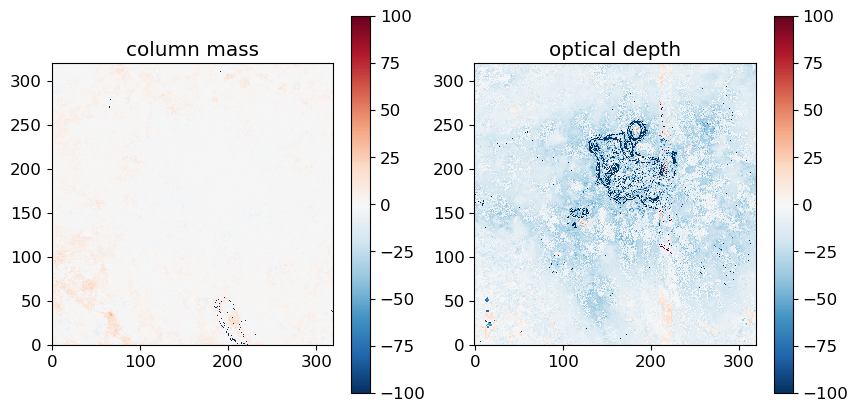

In [98]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(7300*(xi_fit.dat[0,:,:,-1,0]-obs.dat[0,:,:,-1,0]),origin='lower',cmap='RdBu_r',vmin=-100,vmax=100)
plt.title('column mass')
plt.colorbar()
plt.subplot(122)
plt.imshow(7300*(tau_fit.dat[0,:,:,-1,0]-obs.dat[0,:,:,-1,0]),origin='lower',cmap='RdBu_r',vmin=-100,vmax=100)
plt.title('optical depth')
plt.colorbar()

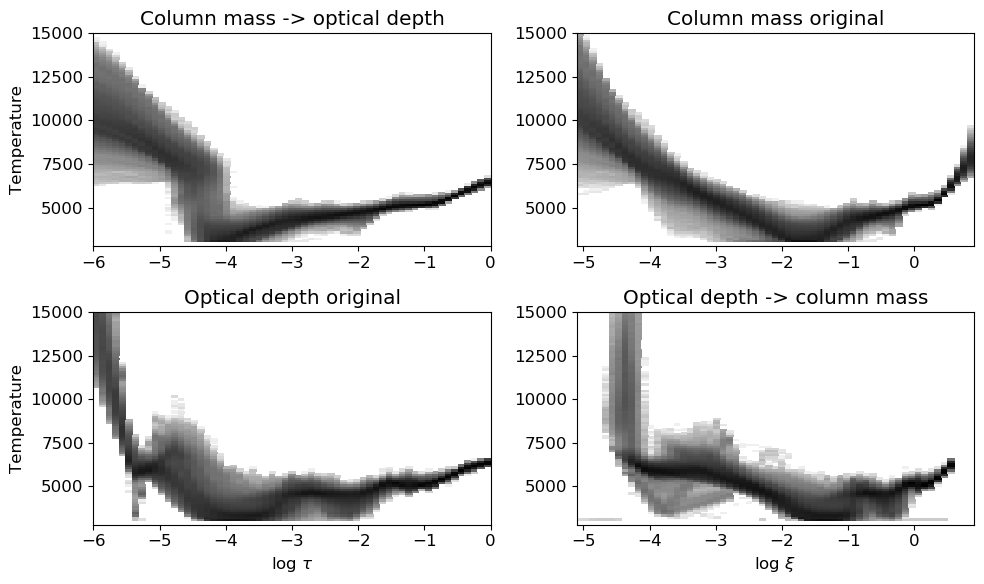

In [71]:
tmin,tmax = 2800,15000
plt.figure(figsize=(10,6),facecolor='w')
plt.subplot(221)
plt.hist2d(tau_mod.ltau.ravel(),xi_to_tau.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.ylabel('Temperature')
plt.title('Column mass -> optical depth')
plt.subplot(222)
plt.hist2d(xi_mod.cmass.ravel(),xi_mod.temp.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.title('Column mass original')
plt.subplot(223)
plt.hist2d(tau_mod.ltau.ravel(),tau_mod.temp.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.xlabel(r'$\log\ \tau$')
plt.ylabel('Temperature')
plt.title('Optical depth original')
plt.subplot(224)
plt.hist2d(xi_mod.cmass.ravel(),tau_to_xi.ravel(),bins=[61,np.linspace(tmin,tmax,100)],\
           cmap='gist_yarg',norm=LogNorm())
plt.xlabel(r'$\log\ \xi$')
plt.title('Optical depth -> column mass')
plt.tight_layout()
plt.savefig('xi_v_tau_temperatures_new.pdf')

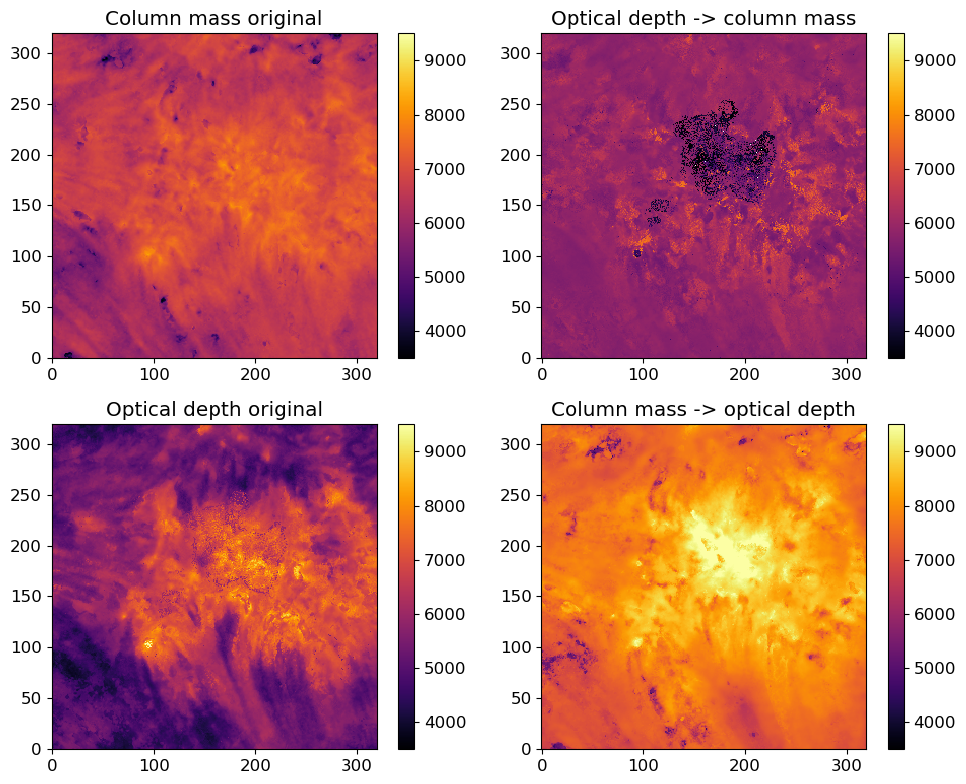

In [106]:
fig,ax = plt.subplots(2,2,figsize=(10,8),facecolor='w')
ht = 12
hx = 14
vmin = 3500
vmax = 9500
ax[0,0].imshow(xi_mod.temp[0,:,:,hx],cmap='inferno',origin='lower',vmin=vmin,vmax=vmax)
ax[0,1].imshow(tau_to_xi[:,:,hx],cmap='inferno',origin='lower',vmin=vmin,vmax=vmax)
ax[1,0].imshow(tau_mod.temp[0,:,:,ht],cmap='inferno',origin='lower',vmin=vmin,vmax=vmax)
ax[1,1].imshow(xi_to_tau[:,:,ht],cmap='inferno',origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar(ax[0,0].images[0],ax=ax[0,0],fraction=0.046,pad=0.05)
plt.colorbar(ax[0,1].images[0],ax=ax[0,1],fraction=0.046,pad=0.05)
plt.colorbar(ax[1,0].images[0],ax=ax[1,0],fraction=0.046,pad=0.05)
plt.colorbar(ax[1,1].images[0],ax=ax[1,1],fraction=0.046,pad=0.05)
ax[0,0].set_title('Column mass original')
ax[0,1].set_title('Optical depth -> column mass')
ax[1,0].set_title('Optical depth original')
ax[1,1].set_title('Column mass -> optical depth')
plt.tight_layout()

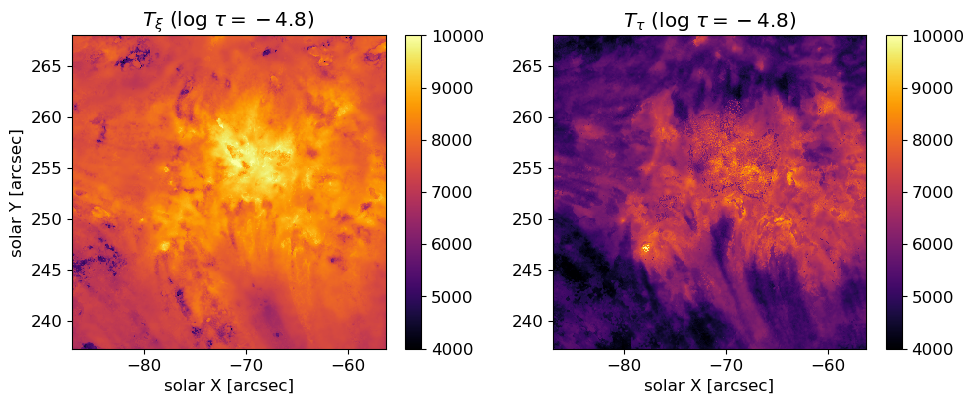

In [105]:
x0,y0 = -87.0, 237.3
w = 0.096*320
x1,y1 = x0+w,y0+w
h = 12
vmin, vmax = 4000, 10000
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(xi_to_tau[:,:,h],extent=[x0,x1,y0,y1],cmap='inferno',origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.xlabel('solar X [arcsec]')
plt.ylabel('solar Y [arcsec]')
plt.title(r'$T_{{\xi}}\ (\log\ \tau = {:.1f})$'.format(tau_mod.ltau[0,0,0,h]))
plt.subplot(122)
plt.imshow(tau_mod.temp[0,:,:,h],extent=[x0,x1,y0,y1],cmap='inferno',origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.xlabel('solar X [arcsec]')
plt.title(r'$T_{{\tau}}\ (\log\ \tau = {:.1f})$'.format(tau_mod.ltau[0,0,0,h]))
plt.tight_layout()
plt.savefig('xi_v_tau_maps-4p8_new.pdf')

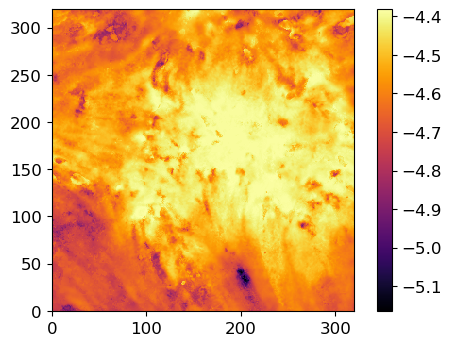

In [20]:
plt.imshow(xi_mod.ltau[0,:,:,12],cmap='inferno',origin='lower')
plt.colorbar()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.26885822, -0.2468231 , -0.22478797, -0.20275285, -0.18071773,
        -0.15868261, -0.13664749, -0.11461237, -0.09257724, -0.07054212,
        -0.048507  , -0.02647188, -0.00443676,  0.01759837,  0.03963349,
         0.06166861,  0.08370373,  0.10573885,  0.12777397,  0.1498091 ,
         0.17184422,  0.19387934,  0.21591446,  0.23794958,  0.25998471,
         0.28201983,  0.30405495,  0.32609007,  0.34812519,  0.37016031,
         0.39219544,  0.41423056,  0.43626568,  0.4583008 ,  0.48033592,
         0.50237104,  0.52440617,  0.54644129,  0.56847641,  0.59051153,
         0.61254665,  0.63458178,  0.6566169 ,  0.67865202,  0.70068714,
         0.72272226,  0.74475738,  0.76679251,  0.78882763,  0.81086275,
         0.83289787, 

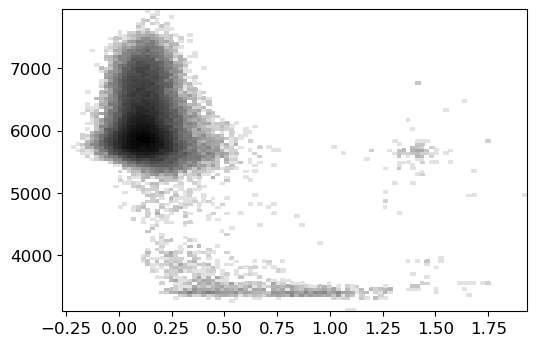

In [89]:
chi_t = np.sum((tau_fit.dat-obs.dat)[0,:,:,:,0]**2/obs.weights[:,0],2)
chi_x = np.sum((xi_fit.dat-obs.dat)[0,:,:,:,0]**2/obs.weights[:,0],2)
range_t = np.max(tau_mod.temp[0,:,:,6:11],2) - np.min(tau_mod.temp[0,:,:,6:11],2)
plt.hist2d(np.log10(chi_t[:,:210]).ravel(),tau_mod.temp[0,:,:210,6].ravel(),bins=100,cmap='gist_yarg',norm=LogNorm())

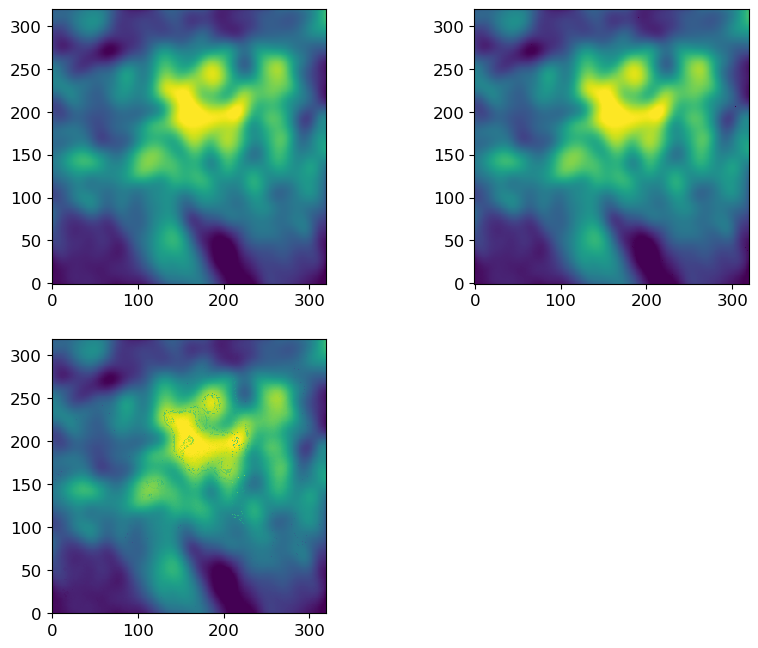

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(obs.dat[0,:,:,-1,0]*7300,origin='lower',vmin=7000,vmax=12000)
plt.subplot(222)
plt.imshow(xi_fit.dat[0,:,:,-1,0]*7300,origin='lower',vmin=7000,vmax=12000)
plt.subplot(223)
plt.imshow(tau_fit.dat[0,:,:,-1,0]*7300,origin='lower',vmin=7000,vmax=12000)

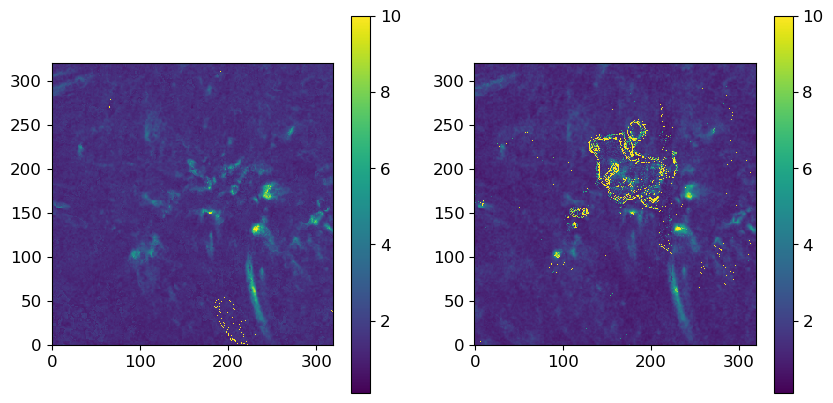

In [92]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(chi_x,origin='lower',vmin=0.1,vmax=10)
plt.colorbar()
plt.subplot(122)
plt.imshow(chi_t,origin='lower',vmin=0.1,vmax=10)
plt.colorbar()

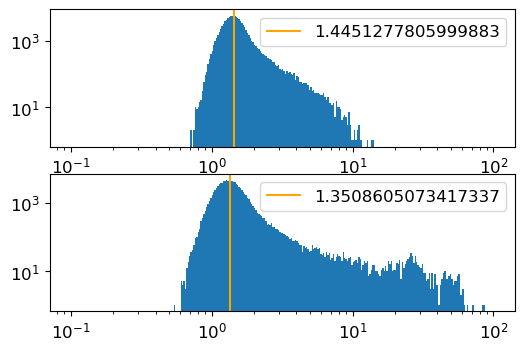

In [96]:
plt.subplot(211)
plt.hist(chi_x.ravel(),bins=10**np.linspace(-1,2,301))
plt.xscale('log')
plt.yscale('log')
xmed = np.median(chi_x.ravel())
plt.axvline(xmed,color='orange',label=str(xmed))
plt.legend()
plt.subplot(212)
plt.hist(chi_t.ravel(),bins=10**np.linspace(-1,2,301))
plt.xscale('log')
plt.yscale('log')
tmed = np.median(chi_t.ravel())
plt.axvline(tmed,color='orange',label=str(tmed))
plt.legend()

<ipython-input-24-dedbc1eb2bdc>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.hist2d(np.arange(75).repeat(len(weird[0])).ravel(),100*(tau_fit.dat/obs.dat-1)[0,weird[0],weird[1],:75,0].T.ravel(),\


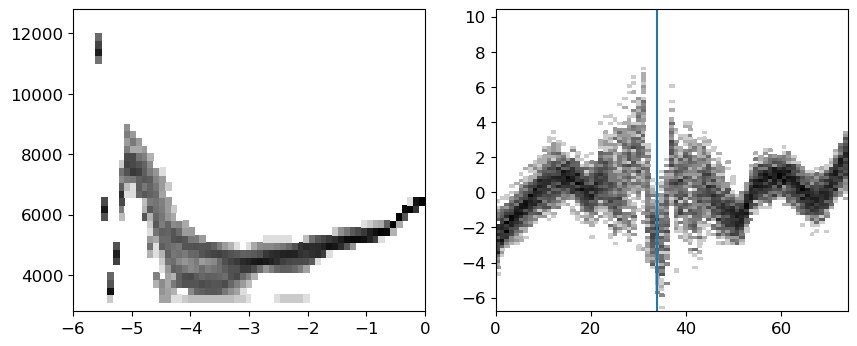

In [24]:
weird = np.where((tau_mod.temp[0,:,:,6] < 4000) & (chi_t < 1.5))
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist2d(tau_mod.ltau[0,weird[0],weird[1],:].ravel(),tau_mod.temp[0,weird[0],weird[1],:].ravel(),\
           bins=[61,100],cmap='gist_yarg',norm=LogNorm())
plt.ylim(2800,12800)
plt.subplot(122)
plt.hist2d(np.arange(75).repeat(len(weird[0])).ravel(),100*(tau_fit.dat/obs.dat-1)[0,weird[0],weird[1],:75,0].T.ravel(),\
           bins=[75,100],cmap='gist_yarg',norm=LogNorm())
plt.axvline(34)

In [47]:
cors = np.zeros((61,61))
for i in range(61):
    for j in range(61):
        cors[i,j] = np.corrcoef(xi_mod.temp[0,:,:,i].ravel(),tau_mod.temp[0,:,:,j].ravel())[0,1]

Text(0.5, 1.0, 'correlations')

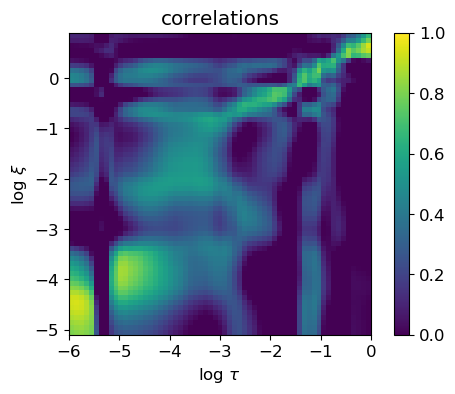

In [55]:
plt.imshow(cors,extent=[-6,0,-5.1,0.9],origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.xlabel(r'$\log\ \tau$')
plt.ylabel(r'$\log\ \xi$')
plt.title('correlations')

In [84]:
cors_XT = np.zeros((61,61))
cors_Xt = np.zeros((61,61))
cors_Xx = np.zeros((61,61))
cors_xT = np.zeros((61,61))
cors_xt = np.zeros((61,61))
cors_Tt = np.zeros((61,61))
tau_to_xi_fixed = np.where(np.isnan(tau_to_xi),0,tau_to_xi)
for i in range(61):
    for j in range(61):
        cors_XT[i,j] = np.corrcoef(xi_mod.temp[0,:,:,i].ravel(),tau_mod.temp[0,:,:,j].ravel())[0,1]
        cors_Xt[i,j] = np.corrcoef(xi_mod.temp[0,:,:,i].ravel(),tau_to_xi_fixed[:,:,j].ravel())[0,1]
        cors_Xx[i,j] = np.corrcoef(xi_mod.temp[0,:,:,i].ravel(),xi_to_tau[:,:,j].ravel())[0,1]
        cors_xT[i,j] = np.corrcoef(xi_to_tau[:,:,i].ravel(),tau_mod.temp[0,:,:,j].ravel())[0,1]
        cors_xt[i,j] = np.corrcoef(xi_to_tau[:,:,i].ravel(),tau_to_xi_fixed[:,:,j].ravel())[0,1]
        cors_Tt[i,j] = np.corrcoef(tau_mod.temp[0,:,:,i].ravel(),tau_to_xi_fixed[:,:,j].ravel())[0,1]

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


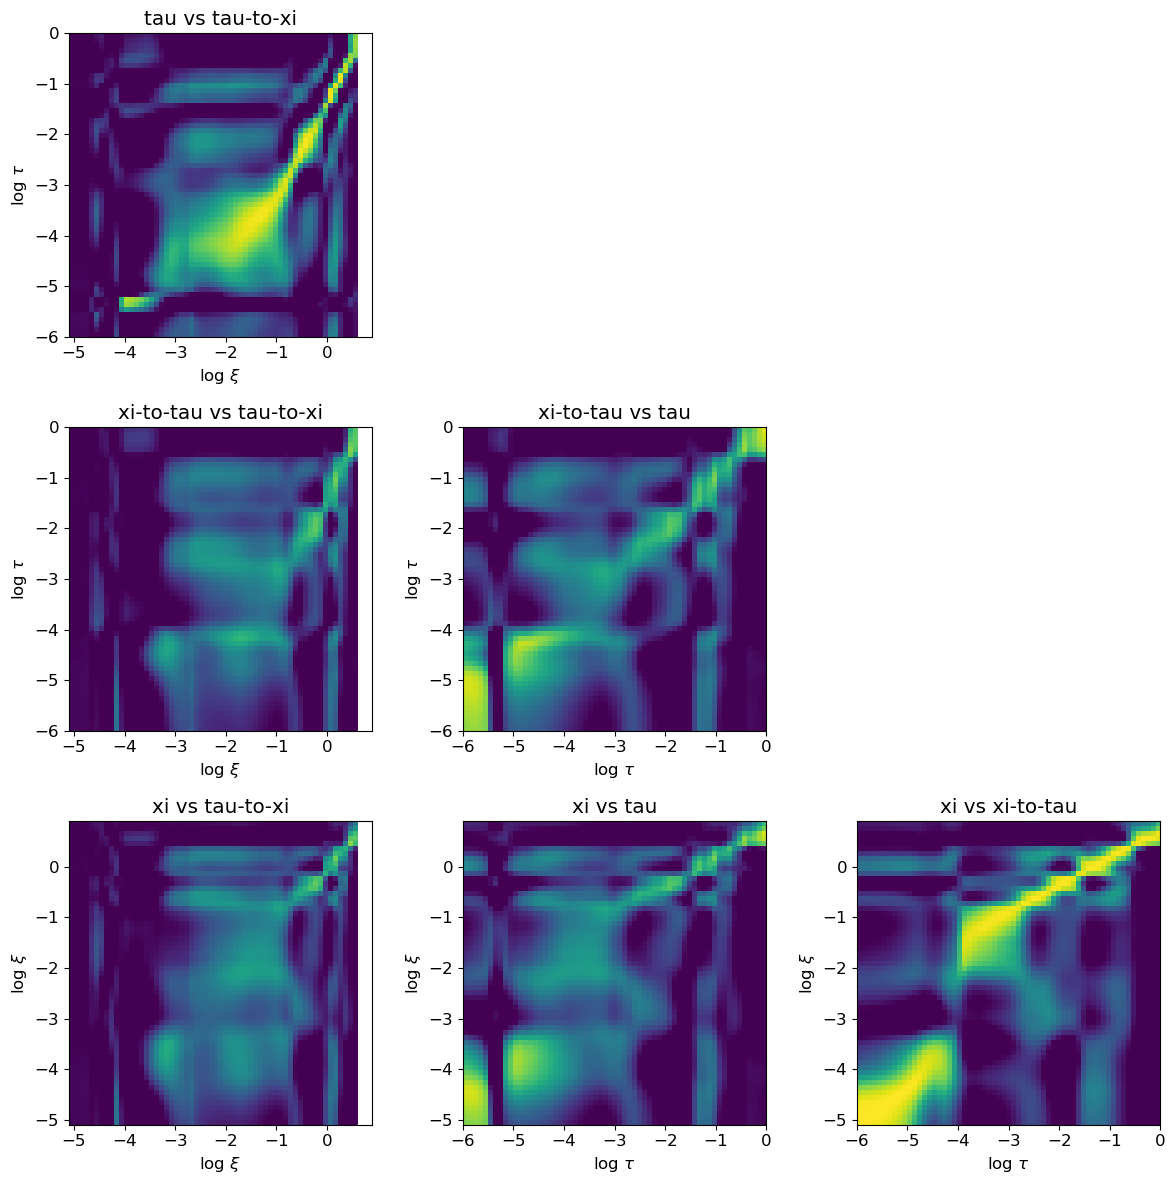

In [88]:
plt.figure(figsize=(12,12))
plt.subplot(331)
plt.imshow(cors_Tt,extent=[-5.1,0.9,-6,0],origin='lower',vmin=0,vmax=1)
plt.xlabel(r'$\log\ \xi$')
plt.ylabel(r'$\log\ \tau$')
plt.title('tau vs tau-to-xi')
plt.subplot(334)
plt.imshow(cors_xt,extent=[-5.1,0.9,-6,0],origin='lower',vmin=0,vmax=1)
plt.xlabel(r'$\log\ \xi$')
plt.ylabel(r'$\log\ \tau$')
plt.title('xi-to-tau vs tau-to-xi')
plt.subplot(335)
plt.imshow(cors_xT,extent=[-6,0,-6,0],origin='lower',vmin=0,vmax=1)
plt.xlabel(r'$\log\ \tau$')
plt.ylabel(r'$\log\ \tau$')
plt.title('xi-to-tau vs tau')
plt.subplot(337)
plt.imshow(cors_Xt,extent=[-5.1,0.9,-5.1,0.9],origin='lower',vmin=0,vmax=1)
plt.xlabel(r'$\log\ \xi$')
plt.ylabel(r'$\log\ \xi$')
plt.title('xi vs tau-to-xi')
plt.subplot(338)
plt.imshow(cors_XT,extent=[-6,0,-5.1,0.9],origin='lower',vmin=0,vmax=1)
plt.xlabel(r'$\log\ \tau$')
plt.ylabel(r'$\log\ \xi$')
plt.title('xi vs tau')
plt.subplot(339)
plt.imshow(cors_Xx,extent=[-6,0,-5.1,0.9],origin='lower',vmin=0,vmax=1)
plt.xlabel(r'$\log\ \tau$')
plt.ylabel(r'$\log\ \xi$')
plt.title('xi vs xi-to-tau')
plt.tight_layout()